<a href="https://colab.research.google.com/github/Graylab/DL4Proteins-notebooks/blob/main/notebooks/WS08_DenoisingDiffusionProbabilisticModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='#569098' size=20> 디노이징 확산 확률 모델 (DDPMs) 소개 </font>**

##[홈페이지로 돌아가기](https://github.com/Graylab/DL4Proteins-notebooks)

이 코드와 튜토리얼은 Sergey Lyskov의 [워크숍](https://colab.research.google.com/drive/1msujJuX3jdo7Mn-PwJnFB5naCVMuZHie)에서 각색되었습니다.

추가 배경 읽기 자료: Ho et al.의 [디노이징 확산 확률 모델](https://arxiv.org/abs/2006.11239)

**목표:** 이 노트북을 마치면 다음을 수행할 수 있습니다:

* <font color='#e59454'>확산 모델이 데이터를 생성하는 방식 설명</font>
* <font color='#e59454'>확산 모델의 두 가지 구성 요소 정의</font>
* <font color='#e59454'>높은 수준에서 수학적 형식과 단순화 설명</font>
* <font color='#e59454'>코드로 정방향 및 역방향 확산 프로세스 구현</font>
* <font color='#e59454'>손실 항(term)과 모델이 학습하는 파라미터 해석

**_작업 내용을 저장하려면 이 노트북의 사본을 개인 Google 드라이브에 저장하세요._**


<b> <font color='#569098' size = 5>  목차 </font>

**[섹션 0: 개요](https://colab.research.google.com/drive/15fCPiDjSJnvPTwhM8jWoKIAuJmGP4vsj#scrollTo=XkY4tT7ZOxuP&line=1&uniqifier=1)**

**[섹션 1: 정방향 프로세스](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=nMzFF7o9bRwG)**
* [데이터에 노이즈 추가하기](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=YxCkluTLIMLG)
* [노이즈 추가 스케줄링](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=-huK_DknYQW-)
* [순차적 vs 병렬 생성](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=_SROX_V47xc8)
* [사인파를 사용하여 정방향 프로세스 구현하기](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=7k6ERPVGVoSs)

**[섹션 2: 역방향 프로세스](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=ASQX99DCV94a)**
* [모델 출력: 원본 데이터 생성](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=lUWDVXo8smv_)
* [손실 항](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=0xffNL5beGOk)

**[섹션 3: DDPM 구현](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=DOR39UfpZ1BS)**
* [시간 임베딩](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=FFdAnllTdMPL)
* [신경망](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=Vu1n4KCKzOBK)
* [학습](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=qTUBEG79zOBK)
* [생성](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=mJCOqXF4zOBL)
* [사후 분산](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=VQmOKeVz2QPN)

**[섹션 4: 요약 및 질문](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=GO3VMCveLNSL)**
* [확산 모델 이해하기](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=R957IzirMhXc&line=12&uniqifier=1)
* [수학적 기초](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=R957IzirMhXc&line=12&uniqifier=1)
* [질문](https://colab.research.google.com/drive/1off5TdGgq00vxtBHOtPpPBBYwM_40UmH#scrollTo=utSPj6kHQlKP&line=1&uniqifier=1)

# <b><font color='#569098'> 섹션 0: 개요 </font></b> ##



디노이징 확산 모델은 노이즈로부터 데이터 샘플을 생성하는 생성 모델입니다. DALLE-2, Imagen 또는 Stable Diffusion과 같은 도구를 사용하여 텍스트 입력에서 이미지를 생성한 적이 있다면 이미 데이터 생성을 위한 확산 모델의 힘을 알고 있는 것입니다. GAN(Generative Adversarial Networks) 및 VAE(Variational AutoEncoders)와 같은 다른 생성 모델에 비해 DDPM은 더 낮은 계산 비용으로 더 나은 품질의 이미지를 생성합니다.

확산 아키텍처에는 두 가지 프로세스가 있습니다-

1. 샘플의 데이터를 파괴하고 노이즈로 변환하는 <font color='#e59454'>정방향 프로세스(Forward Process)</font>.
2. 추가된 노이즈를 예측하고 원본/유사한 이미지를 반환하는 <font color='#e59454'>역방향 프로세스(Reverse Process)</font>.

주황색 상자가 가능한 모든 데이터 표현의 전체 공간을 나타낸다고 가정해 봅시다. 이 공간 내에서 우리는 흰색 원 안에 둘러싸인 데이터 포인트의 하위 집합에 특히 관심이 있습니다. 녹색 점은 이 하위 집합 내에 있는 우리가 관심 있는 데이터 종류의 예입니다.

녹색 점에 확산 과정을 적용하면 데이터가 흰색 원에서 멀어져 데이터 공간의 더 넓은 영역으로 밀려납니다. 확산 모델은 녹색 점을 흰색 원 안의 원래 위치로 다시 안내하도록 학습됩니다.


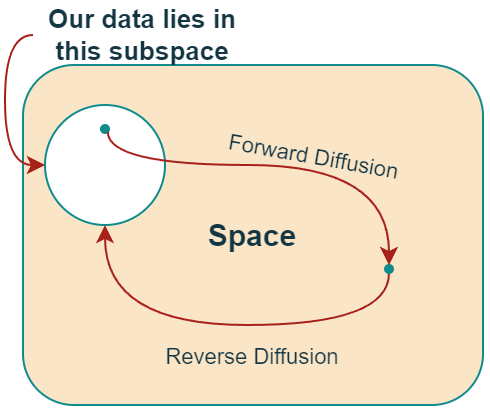

이미지 출처: https://learnopencv.com/denoising-diffusion-probabilistic-models/

In [ ]:
#@markdown <font color='#e59454'> <b> Question Time! Run to Show Question </b>

import random
from IPython.display import display, HTML

def create_quiz(question, correct_answers, decoy_answers):
    # Combine the correct answers with the decoy answers
    answers = correct_answers + decoy_answers
    # Shuffle the answers
    random.shuffle(answers)

    # Generate the HTML code
    html_code = f""" <div style="font-family: Arial, sans-serif; margin: 30px; max-width: 1000px;">
    <h3 style="word-wrap: break-word;">{question}</h3>"""

    # Add each answer as a checkbox
    for i, answer in enumerate(answers):
        html_code += f"""
        <div style="word-wrap: break-word; margin-bottom: 10px;">
        <input type="checkbox" id="option{i}" name="quiz" value="{answer}">
        <label for="option{i}" id="label{i}">{answer}</label>
        </div>"""

    # Add the submit button and feedback section
    html_code += f"""
    <button onclick="checkAnswers()">Submit</button>
    <p id="feedback" style="font-weight: bold;"></p>
    </div>
    <script>
    function checkAnswers() {{
        var checkboxes = document.getElementsByName('quiz');
        var correctAnswers = {str(correct_answers)};
        var feedback = document.getElementById('feedback');
        var numCorrect = 0;

        // Check each answer
        for (var i = 0, length = checkboxes.length; i < length; i++) {{
            var checkbox = checkboxes[i];
            var label = document.getElementById('label' + i);

            if (correctAnswers.includes(checkbox.value)) {{
                if (checkbox.checked) {{
                  if (numCorrect >= 0) {{
                    numCorrect++;
                  }}
                    label.style.color = "green";
                }} else {{
                    //label.style.color = "red";
                }}
            }} else if (checkbox.checked) {{
                numCorrect = -9999;
                label.style.color = "red";
            }} else {{
                //label.style.color = "inherit";
            }}
        }}

        // Provide feedback
        if (numCorrect === {len(correct_answers)}) {{
            feedback.innerHTML = "Correct! Only the reverse process requires a neural network. <br> Since the forward process makes the data noisy, we can use a predefined algorithm to implement the noising!";
            feedback.style.color = "green";
        }} else {{
            feedback.innerHTML = "Incorrect. Only the reverse process requires a neural network. <br> Since the forward process makes the data noisy, we can use a predefined algorithm to implement the noising!";
            feedback.style.color = "red";
        }}
    }}
    </script>"""

    display(HTML(html_code))

# Example
question = "At which step is the neural network used? Select all the correct answers."
correct_answers = ["Reverse Process"]
decoy_answers = ["Forward Process"]
create_quiz(question, correct_answers, decoy_answers)

정방향 및 역방향 프로세스를 자세히 살펴보겠습니다.

다음 셀을 실행하여 신경망을 위한 표준 패키지를 로드하고 GPU(사용 가능한 경우)를 활성화하세요.


In [ ]:
#Run this cell to load the standard packages for neural networks
import random, math
from tqdm import tqdm # fun package to display a status bar during time consuming loops
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(0);
torch.manual_seed(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# **<font color='#569098'> 섹션 1: 정방향 프로세스 </font>**

분포 $q$로 설명되는 정방향 프로세스는 데이터에 점진적으로 노이즈를 추가합니다. 데이터가 순수한 가우스 노이즈로 변환될 때까지 여러 타임스텝에 걸쳐 수행됩니다. 이미지를 예로 들면, $t = 0$에서 실제 이미지 $x_0$로 시작하여 매 타임스텝 $t$마다 이전 타임스텝의 이미지에 약간의 노이즈를 추가합니다. 노이즈는 일반적으로 평균이 0이고 표준 편차가 1인 가우스 분포에서 샘플링됩니다. 따라서,

$$x_t = x_{t-1} + \text{noise}$$.

정방향 프로세스는 다음과 같이 시각화할 수 있습니다: <br>
<img src = "https://erdem.pl/static/eb1c5091b8115b21499e408a8edf7b82/0f98f/cos_noise.jpg" width ="2000px">
이미지 출처: 확산 모델에 대한 단계별 시각적 소개 [https://erdem.pl/2023/11/step-by-step-visual-introduction-to-diffusion-models]

확산 과정을 이해하기 위해 표준 PyTorch 부품으로 간단한 모델을 구축해 보겠습니다. 노이즈를 추가하고 제거할 사인파의 1차원 데이터셋을 만들어 봅시다.

각 사인파는 위상, 주파수 및 진폭을 무작위로 샘플링하여 생성됩니다. 각 배치(batch_size)에 64개의 사인파가 있는 32개 포인트(input_size) 세트를 샘플링합니다. 가장 간단한 경우로 주파수와 진폭에 대한 가중치 변수를 0으로 설정했습니다.

이 노트북의 후속 라운드에서 이 변수들을 자유롭게 플레이해 보세요.

In [ ]:
input_size = 32
batch_size = 64

historical_total_loss = []

class SineFunctionDataSet(Dataset):
  def __init__(self, size):
    super().__init__()
    self.input_size = input_size
    data = []

    for i in range(size):
      phase = 10*random.random() * 2.0 * 3.15 * 10
      freq = 14 + 0 * random.random()
      amplitude = 1 + 0*random.random()

      # equation for the sin wave: y = amplitude * sin( x * frequency / input_size + phase)
      data.append( torch.Tensor([ amplitude * math.sin(t_sin*freq/input_size + phase) for t_sin in range(input_size) ] ))

    self.data = data

  def __len__(self):
    return len(self.data)

  def __getitem__(self, i):
    return self.data[i]

sine_data = SineFunctionDataSet(1024*8)
data_loader = DataLoader(sine_data, batch_size = batch_size, drop_last=True)

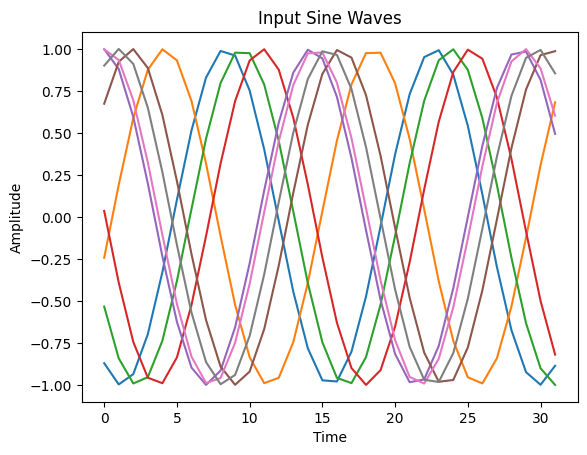

In [ ]:
#visualizing the data
for i in sine_data[0:8]:
  plt.plot(i)
  plt.xlabel("Time")
  plt.ylabel("Amplitude")
  plt.title("Input Sine Waves")

이 분포에서 샘플링하여 데이터 샘플 $x_0$를 얻을 수 있습니다.

타임스텝 $t-1$의 데이터 $x_{t-1}$을 입력으로 받아 가우스 노이즈를 추가하여 다음 타임스텝 $t$의 샘플을 생성하는 정방향 프로세스 $q$를 정의합니다. 첫 번째 타임스텝의 경우 $q_{t_0} \sim x_0$입니다. 추가할 노이즈의 양(또는 가중치)은 분산 스케줄 $\beta_t$를 따릅니다.

따라서 정방향 프로세스는 다음과 같이 정의됩니다:
$$q(x_t | x_{t-1}) = \mathcal{N}(x_t ; \sqrt{1-\beta_t}x_{t-1},\beta_t \bf{I}),$$

여기서 $\mathcal{N}$은 평균 $\mu_t = \sqrt{1-\beta_t}x_{t-1}$ 및 분산 $\sigma^2 = \beta_t$의 두 파라미터로 정의되는 정규 분포(일명 가우스 분포)입니다.

이 방정식은 다음과 같이 재매개변수화(reparameterized)될 수 있습니다.
$$q(x_t | x_{t-1}) = \sqrt{1-\beta_t}x_{t-1} + \sqrt{\beta_t} \mathcal{E},$$
여기서 $\mathcal{E}\in\mathcal{N}(0,1)$입니다.

In [ ]:
#@markdown <font color='#e59454'> <b> Question Time! Run to Show Question </b>

import random
from IPython.display import display, HTML

def create_quiz(question, correct_answers, decoy_answers):
    # Combine the correct answers with the decoy answers
    answers = correct_answers + decoy_answers
    # Shuffle the answers
    random.shuffle(answers)

    # Generate the HTML code
    html_code = f""" <div style="font-family: Arial, sans-serif; margin: 30px; max-width: 1000px;">
    <h3 style="word-wrap: break-word;">{question}</h3>"""

    # Add each answer as a checkbox
    for i, answer in enumerate(answers):
        html_code += f"""
        <div style="word-wrap: break-word; margin-bottom: 10px;">
        <input type="checkbox" id="option{i}" name="quiz" value="{answer}">
        <label for="option{i}" id="label{i}">{answer}</label>
        </div>"""

    # Add the submit button and feedback section
    html_code += f"""
    <button onclick="checkAnswers()">Submit</button>
    <p id="feedback" style="font-weight: bold;"></p>
    </div>
    <script>
    function checkAnswers() {{
        var checkboxes = document.getElementsByName('quiz');
        var correctAnswers = {str(correct_answers)};
        var feedback = document.getElementById('feedback');
        var numCorrect = 0;

        // Check each answer
        for (var i = 0, length = checkboxes.length; i < length; i++) {{
            var checkbox = checkboxes[i];
            var label = document.getElementById('label' + i);

            if (correctAnswers.includes(checkbox.value)) {{
                if (checkbox.checked) {{
                  if (numCorrect >= 0) {{
                    numCorrect++;
                  }}
                    label.style.color = "green";
                }} else {{
                    //label.style.color = "red";
                }}
            }} else if (checkbox.checked) {{
                numCorrect = -9999;
                label.style.color = "red";
            }} else {{
                //label.style.color = "inherit";
            }}
        }}

        // Provide feedback
        if (numCorrect === {len(correct_answers)}) {{
            feedback.textContent = "Correct!";
            feedback.style.color = "green";
        }} else {{
            feedback.innerHTML = "Incorrect <br> Since we are adding noise at every timestep, the final output is Gaussian Noise!";
            feedback.style.color = "red";
        }}
    }}
    </script>"""

    display(HTML(html_code))

# Example
question = "What is the final output of the forward diffusion process?"
correct_answers = ["Gausian Noise"]
decoy_answers = ["Denoised Data", "Randomized Inputs", "Original Features"]
create_quiz(question, correct_answers, decoy_answers)


$x_0$에서 시작하여 $x_1$, ..., $x_t$, ..., $x_T$를 생성합니다. 여기서 $x_T$는 순수한 가우스 노이즈입니다. 추가되는 노이즈의 양을 제어하려면 스케줄 $\beta_t$가 필요합니다. 일반적으로 $\beta_t$는 모든 타임스텝마다 증가하여 프로세스를 통해 점진적으로 더 많은 노이즈가 추가됩니다:

$$0 < \beta_1 < \beta_2 < ... < \beta_T < 1$$

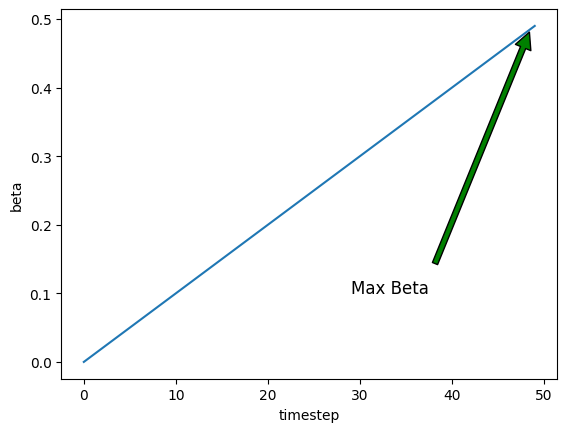

In [ ]:
#@markdown A simple example of a noise schedule is a linear function with increasing $\beta$s

#@markdown The max value of $\beta$ is limited to keep the variance from exploding
betas = torch.arange(0, .5, 0.01)
plt.plot(betas)
plt.xlabel("timestep")
plt.ylabel("beta")

plt.annotate('Max Beta', xy=(49, 0.5), xytext=(29, 0.1), fontsize=12,
            arrowprops=dict(facecolor='green', shrink=0.05));

In [ ]:
#@markdown <font color='#e59454'> <b> Food For Thought! Run to Show Question </b>

from IPython.display import HTML, display
from ipywidgets import widgets

def create_answer_box(question, correct_answer):
    def display_answer(button):
        user_answer = text_area.value.strip()
        result.value = f"<pre class='answer-text'>{correct_answer}</pre>"

    text_area = widgets.Textarea(
        placeholder='Enter your answer here...',
        layout={'width': '95%', 'height': '100px'}
    )
    submit_button = widgets.Button(description="Submit")
    result = widgets.HTML(value="")

    vbox = widgets.VBox([text_area, submit_button, result])
    submit_button.on_click(display_answer)

    display(HTML(f"<b>{question}</b>"))
    display(vbox)
    display(HTML("""
    <style>
    .widget-html-content {
        width: 95%;
        white-space: normal;
        word-wrap: break-word;
    }
    .answer-text {
        width: 90%;
        color: black;
        line-height: 1.5;
        white-space: pre-wrap;
        word-wrap: break-word;
        font-family: inherit;
        font-size: inherit;
        margin: 0;
        padding: 0;
    }
    </style>
    """))

# Example usage
create_answer_box("What is the problem with an exploding gradient?", "Recall how a neural network is trained: "
                  "at the end of the forward pass the derivatives are "
                  "backpropagated and used to update the model weight. When the variance "
                  "is too high these derivatives dominate the model weights, making "
                  "it difficult to converge to a minimum during gradient descent."
                  "Refresh the concepts from one of the earlier notebooks if this difficult to follow")

그러나 2021년 OpenAI의 연구원들은 선형 스케줄이 가장 효율적이지 않다는 것을 발견했습니다. 선형 스케줄을 사용하면 전체 단계의 약 절반 후에 원본 이미지의 대부분이 손실됩니다. 남은 데이터는 학습하기에 그리 유용하지 않습니다. 이 단점을 극복하고 학습 시간을 효과적으로 활용하기 위해 연구원들은 노이즈를 더 천천히 추가하는 맞춤형 스케줄을 설계했습니다. 유용한 스케줄 중 하나는 코사인 스케줄입니다. 아래 이미지에서 하단의 코사인 스케줄이 초기 타임스텝에서 더 많은 정보를 보존하는 반면 이후 타임스텝에서는 더 큰 노이즈를 추가하는 것을 볼 수 있습니다:

<img src = 'https://cdn.analyticsvidhya.com/wp-content/uploads/2024/07/Screenshot-from-2024-07-24-14-14-44.png' width = 1000 px>

다양한 스케줄 시각화.
**상단 패널:** 선형 스케줄 **하단 패널:** 코사인 스케줄

이미지 출처: 향상된 디노이징 확산 확률 모델, Alex Nichol, Prafulla Dhariwal 2021


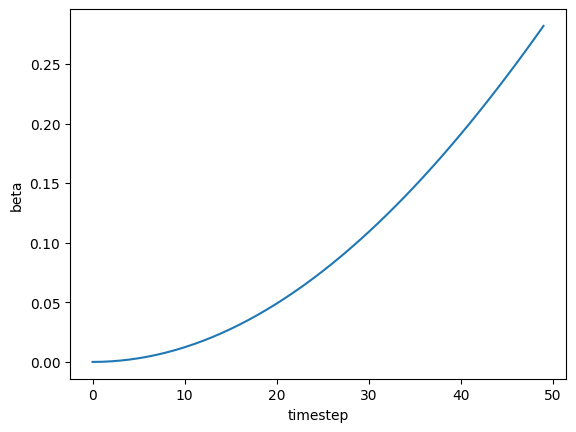

In [ ]:
# Cosine schedule
betas_linear = torch.arange(0, .5, 0.01)
betas = 1 - ( betas_linear * torch.pi / 2 ).cos()
plt.plot(betas);
plt.xlabel("timestep");
plt.ylabel("beta");

위에서 설명한 대로 정방향 확산 프로세스는 $t_0$에서 시작하여 $t_T$까지 순차적으로 이동합니다. 각 타임스텝의 샘플이 이전 샘플에 의존하기 때문입니다. 단계별로 노이즈를 추가하는 것은 비용이 많이 듭니다. 프로세스를 더 빠르게 만들기 위해 여러 단계의 효과를 결합하여 원하는 타임스텝에서의 출력을 정의하는 하나의 공식을 생성할 수 있습니다 ([여기에서 자세한 내용 확인](https://erdem.pl/2023/11/step-by-step-visual-introduction-to-diffusion-models#:~:text=But%202020%20paper%20has%20the%20solution%2C%20but%20first%2C%20we%20have%20to%20define%20the%20entire%20noise%20to%20be%20added%20at%20T%20as%3A)).

$$q(x_t | x_0) = \sqrt{\bar{\alpha_t}}x_0 + \sqrt{1 - \bar{\alpha_t}} \mathcal{E}$$
여기서
$$\alpha_t = 1 - \beta_t$$
$$\bar{\alpha}_t := Π^t_{s=1} a_s$$입니다.

$\alpha$ 값을 계산하고 저장해 봅시다:

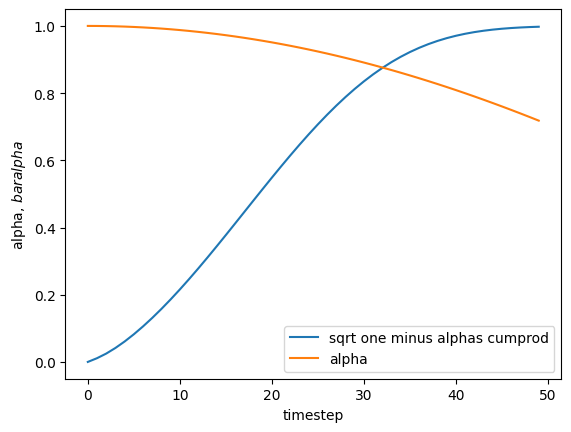

In [ ]:
alphas = torch.Tensor( [1.0 - b for b in betas] )
alphas_cumprod = torch.cumprod(alphas, dim=0)
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)

# let's also store our previous alphas, which will come in use later
alphas_prev = F.pad(alphas[:-1], (1, 0), value=1.0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)

plt.plot(sqrt_one_minus_alphas_cumprod, label = 'sqrt one minus alphas cumprod')
plt.plot(alphas, label ='alpha')
plt.xlabel("timestep");
plt.ylabel(r"alpha, $bar{alpha}$");
plt.legend();

이제 다양한 상수를 얻었습니다. 다음으로 특정 타임스텝 $t$에서 데이터에 노이즈를 추가하는 함수를 만들어 봅시다.

In [ ]:
def noised_data(x0, t, noise=None):
	if noise is None: noise = torch.randn_like(x0)

	alpha_t = alphas_cumprod[t]

	x = x0 * torch.sqrt(alpha_t) + torch.sqrt(1.0 - alpha_t) * noise

	return x, noise

사인파에 노이즈를 추가하는 예를 살펴봅시다. 이미지는 확산 과정을 통해 진화하며 지정된 스케줄에 따라 시간이 지남에 따라 분산이 감소함에 따라 점차 노이즈가 많아집니다.

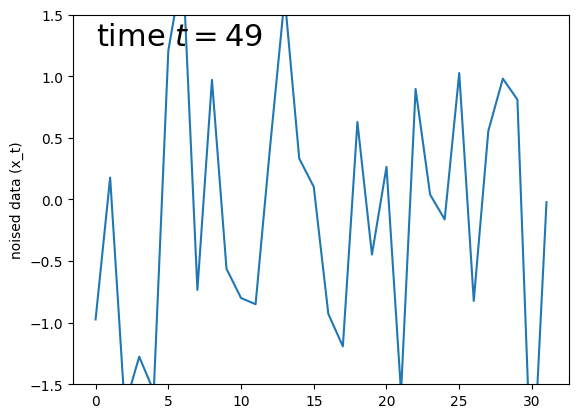

In [ ]:
import time
import pylab as pl
from IPython.display import display, clear_output

example = next(iter(data_loader))
for i in range(len(betas)):
  plt.clf()
  plt.plot( noised_data(example, i)[0][0] )
  plt.ylabel("noised data (x_t)")
  plt.ylim(-1.5,1.5)
  plt.text(0, 1.25, 'time $t = $'+str(i), fontsize = 22)
  display(pl.gcf())
  clear_output(wait=True)
  time.sleep(0.04)

In [ ]:
#@markdown <font color='#e59454'> <b> Run to Show Question </b>

create_answer_box('Can we have a constant variance schedule? How will it impact the forward process?',
                  'Yes we can! But it would make the noise uniform and suboptimally utilze the learning capacity of the model. The choice of variance schedule is important in deciding the performance of the model.')


In [15]:
#@markdown <font color='#e59454'> <b> This is a trickier question but give it a try! Run to Show Question </b>

from IPython.display import HTML, display
from ipywidgets import widgets

def create_answer_box(question, correct_answer):
    # Function to display the answer when the button is clicked
    def display_answer(button):
        user_answer = text_area.value.strip()
        result.value = f"<pre class='answer-text'>{correct_answer}</pre>"
        display(HTML(mathjax_script))  # Refresh MathJax to render equations

    # Create a text area for user input
    text_area = widgets.Textarea(
        placeholder='Enter your answer here...',
        layout={'width': '95%', 'height': '100px'}
    )

    # Create a submit button
    submit_button = widgets.Button(description="Submit")

    # Create an HTML widget to display the correct answer
    result = widgets.HTML(value="")

    # Create a vertical box layout for the text area, button, and result
    vbox = widgets.VBox([text_area, submit_button, result])

    # Bind the button click event to the display_answer function
    submit_button.on_click(display_answer)

    # Display the question with LaTeX support using MathJax
    mathjax_script = """
    <script type="text/javascript" async
      src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-MML-AM_CHTML">
      </script>"""

    # Display the question and widgets
    display(HTML(mathjax_script))
    display(HTML(f"<b>{question}</b>"))
    display(vbox)

    # Add custom styling for the output box
    display(HTML("""
    <style>
    .widget-html-content {
        width: 95%;
        white-space: normal;
        word-wrap: break-word;
    }
    .answer-text {
        width: 90%;
        color: black;
        line-height: 1.5;
        white-space: pre-wrap;
        word-wrap: break-word;
        font-family: inherit;
        font-size: inherit;
        margin: 0;
        padding: 0;
    }
    </style>
    """))

# Example usage with LaTeX equations in both question and correct answer
question = r"Here is the forward process equation: $$q(x_t | x_{t-1}) = \mathcal{N}(x_t ; \sqrt{1-\beta_t}x_{t-1},\beta_t \mathbf{I})$$ Why do we add a weight term to the mean? $$ weight = \sqrt{1-\beta_t} $$"

# Correct answer with LaTeX for \beta and other symbols
correct_answer = r"""By weighing the x_t term we reduce the contribution of the original signal gradually, ensuring that the final output of the forward process is nearly Gaussian noise. To visualize this, consider a one-dimensional data distribution consisting of a waveform with multiple peaks, as shown below. The goal of the forward process is to destroy the data and convert it to a normal distribution with a single peak (mean) at 0 and unit variance.
<img src='https://learnopencv.com/wp-content/uploads/2023/02/denoising-diffusion-probabilistic-models_forward_process_changing_distribution.png' width='400px'>
Image Source: https://ayandas.me/blog-tut/2021/12/04/diffusion-prob-models.html
"""
create_answer_box(question, correct_answer)


# **<font color='#569098'>섹션 2: 역방향 프로세스 </font>**##

역방향 프로세스에서 모델은 노이즈가 있는 버전에서 원본 이미지를 생성하는 방법을 학습합니다.

<font color='#e59454'> *추가적인 전문적 세부 정보: 모델이 학습 데이터와 유사한 데이터를 생성하기를 원하지만 정확한 복제본을 목표로 하지는 않습니다. 대신 생성된 데이터가 원본 이미지와 동일한 분포에 속하도록 하는 것이 목표입니다. 예를 들어 모델이 노란 해바라기 이미지로 학습된 경우, 단일 고정 색조를 재현하는 대신 자연스러운 변형을 도입하여 다양한 노란색 음영의 해바라기를 생성할 수 있어야 합니다. 이를 통해 모델은 개별 데이터 포인트를 단순히 암기하는 것이 아니라 데이터 분포 내의 다양성을 포착할 수 있습니다.* </font>

조건부 분포 $p(x_{t-1}|x_t)$를 안다면, 즉 노이즈가 더 많은 이미지 $x_t$에 대한 노이즈가 덜한 이미지 $x_{t-1}$의 의존성을 안다면, 가우스 노이즈 $x_T$에서 샘플링한 다음 점진적으로 디노이징하여 실제 분포 $x_0$의 샘플로 끝나는 프로세스를 역으로 실행할 수 있습니다.

그러나 우리는 $p(x_{t-1}|x_t)$를 모릅니다. 이 조건부 확률을 계산하려면 특정 $x_t$를 초래할 수 있는 모든 가능한 $x_{t-1}$의 분포를 알아야 하므로 다루기 힘듭니다. 따라서 우리는 신경망을 사용하여 조건부 분포 $p(x_0|x_t)$를 예측할 것입니다.

모델의 예측은 $p_\theta (x_{t-1}|x_t)$로 표현되며, 여기서 $\theta$는 경사 하강법에 의해 업데이트되는 신경망의 파라미터입니다. 각 단계에서 일반적으로 선택되는 함수 형태는 가우스입니다:

$$p_\theta(x_{t-1} | x_t) = \mathcal{N}(x_{t-1} ; \mu_\theta (x_t, t),\sigma^2_\theta(x_t, t ))$$

여기서 평균과 분산도 노이즈 레벨 $t$에 따라 조건부입니다. 이런 식으로 우리의 네트워크는 이제 가우스 분포에 대한 이러한 파라미터, $\mu$ 및 $\sigma$를 예측해야 합니다.

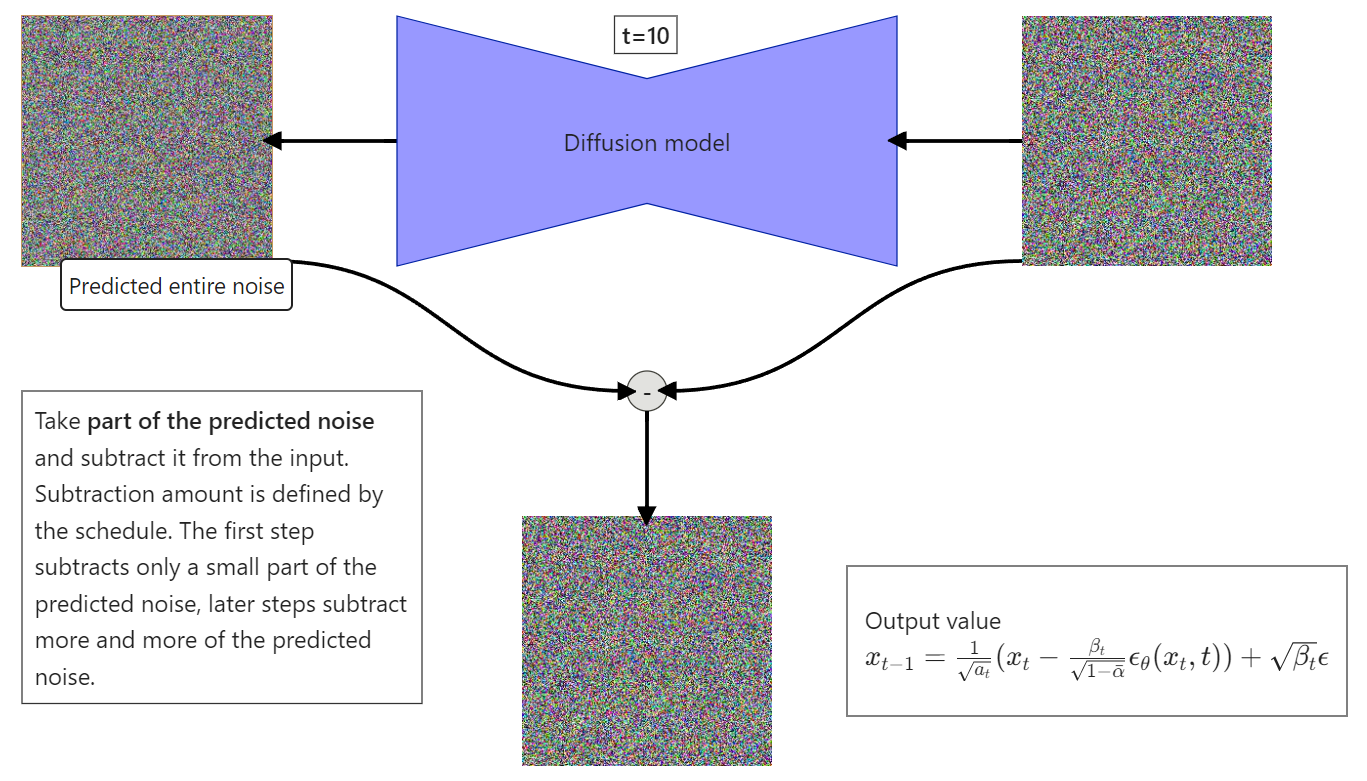

이미지 출처: https://erdem.pl/2023/11/step-by-step-visual-introduction-to-diffusion-models

<b><h1> <font color='#569098'> 손실 항 (THE LOSS TERM) </font></h1></b>

모든 타임스텝에서 노이즈 이미지와 예측 이미지의 차이는 추가된 노이즈를 정의합니다.

모델의 총 손실은 모든 타임스텝에서의 손실의 합입니다:

$$L = L_0 + L_1 + L_2 + L_3 + L_4 ...  + L_T$$

$L_T$ 손실은 무시할 수 있습니다. 해당 타임스텝에서는 학습할 신경망 파라미터가 없으며 우리가 할 수 있는 최선의 방법은 좋은 분산 스케줄러를 정의하고 적절한 크기의 타임스텝을 사용하는 것이기 때문입니다.

경험적으로 [디노이징 확산 확률 모델](https://arxiv.org/abs/2006.11239) 논문의 저자들은 모델이 $L_0$ 항 없이 더 나은 성능을 발휘한다는 것을 발견하여 학습 중에 종종 무시됩니다.

그런 다음 쿨백-라이블러(Kullback–Leibler) 발산을 사용하여 $L_t$를 추정할 수 있습니다. 이는 단순히 원본 확률 분포와 예측된 분포 간의 차이를 측정하는 것입니다.

$$ D_{KL}(q(x_t| x_0) ∥ p_θ(x_t| x_t−1)) = - ELBO + log(p_θ(x_0| x_t)) $$

우리는 $D_{KL}$을 최소화하기를 원하며 조건부 확률은 상수입니다. 따라서 학습에 사용할 수 있는 유일한 항은 ELBO입니다. ELBO(Evidence Lower Bound)는 재구성 손실을 모델이 매끄럽고 연속적인 분포를 학습하도록 장려하는 정규화 항과 결합합니다.

ELBO를 최대화하면(따라서 $D_{KL}$을 최소화하면) 모델이 데이터에 잘 맞을 뿐만 아니라 새로운 데이터로 효과적으로 일반화됩니다.

각 타임스텝에서 원본 확률 분포를 예측하는 대신 $p_θ$ 방정식을 재매개변수화하여 노이즈만 예측할 수 있습니다.

$$x_{t-1}  = \mathcal{N}(x_{t-1} ; \frac{1}{\sqrt{\alpha_t}}(x_t - \frac{\beta_t}{\sqrt{1 - \bar{\alpha_t}}}\mathcal{E_\theta}(x_t, t)), \sqrt{\beta_t}\mathcal{E})$$

변분 추론(variational inference)에 대한 자세한 내용은 다음에서 확인하세요: https://gregorygundersen.com/blog/2021/04/16/variational-inference/

우리는 많은 새로운 개념을 살펴보았지만 핵심 내용은 모델이 각 단계에서 노이즈를 예측하도록 학습되고 학습에 사용하는 최종 손실 항은 정방향 프로세스에서 추가된 노이즈와 모델이 예측한 노이즈 간의 평균 제곱 오차(MSE)라는 것입니다.

<img src= "https://learnopencv.com/wp-content/uploads/2023/02/denoising-diffusion-probabilistic-models-loss_equations_10.png" width = 300>


In [ ]:
# @markdown <font color='#e59454'> <b> Run the cell for the question</b></font>
def create_quiz(question, correct_answers, decoy_answers):
    # Combine the correct answers with the decoy answers
    answers = correct_answers + decoy_answers
    # Shuffle the answers
    random.shuffle(answers)

    # Generate the HTML code
    html_code = f""" <div style="font-family: Arial, sans-serif; margin: 30px; max-width: 1000px;">
    <h3 style="word-wrap: break-word;">{question}</h3>"""

    # Add each answer as a checkbox
    for i, answer in enumerate(answers):
        html_code += f"""
        <div style="word-wrap: break-word; margin-bottom: 10px;">
        <input type="checkbox" id="option{i}" name="quiz" value="{answer}">
        <label for="option{i}" id="label{i}">{answer}</label>
        </div>"""

    # Add the submit button and feedback section
    html_code += f"""
    <button onclick="checkAnswers()">Submit</button>
    <p id="feedback" style="font-weight: bold;"></p>
    </div>
    <script>
    function checkAnswers() {{
        var checkboxes = document.getElementsByName('quiz');
        var correctAnswers = {str(correct_answers)};
        var feedback = document.getElementById('feedback');
        var numCorrect = 0;

        // Check each answer
        for (var i = 0, length = checkboxes.length; i < length; i++) {{
            var checkbox = checkboxes[i];
            var label = document.getElementById('label' + i);

            if (correctAnswers.includes(checkbox.value)) {{
                if (checkbox.checked) {{
                  if (numCorrect >= 0) {{
                    numCorrect++;
                  }}
                    label.style.color = "green";
                }} else {{
                    //label.style.color = "red";
                }}
            }} else if (checkbox.checked) {{
                numCorrect = -9999;
                label.style.color = "red";
            }} else {{
                //label.style.color = "inherit";
            }}
        }}

        // Provide feedback
        if (numCorrect === {len(correct_answers)}) {{
            feedback.innerHTML = "Correct! <br>  As discussed in the above section, at each step the model predicts the noise which has to be removed to obtain the original data";
            feedback.style.color = "green";
        }} else {{
            feedback.innerHTML = "Incorrect. <br> As discussed in the above section, at each step the model predicts the noise which has to be removed to obtain the original data";
            feedback.style.color = "red";
        }}
    }}
    </script>"""

    display(HTML(html_code))
question = "What is the model trained to predict at each time step?"
correct_answers = ["Noise Added to the Data"]
decoy_answers = ["Conditional Probability", "Randomized Probability Distribution", "Original Data"]
create_quiz(question, correct_answers, decoy_answers)

In [ ]:
# @markdown <font color='#e59454'> <b> Run the cell for the question</b></font>
def create_quiz(question, correct_answers, decoy_answers):
    # Combine the correct answers with the decoy answers
    answers = correct_answers + decoy_answers
    # Shuffle the answers
    random.shuffle(answers)

    # Generate the HTML code
    html_code = f""" <div style="font-family: Arial, sans-serif; margin: 30px; max-width: 1000px;">
    <h3 style="word-wrap: break-word;">{question}</h3>"""

    # Add each answer as a checkbox
    for i, answer in enumerate(answers):
        html_code += f"""
        <div style="word-wrap: break-word; margin-bottom: 10px;">
        <input type="checkbox" id="option{i}" name="quiz" value="{answer}">
        <label for="option{i}" id="label{i}">{answer}</label>
        </div>"""

    # Add the submit button and feedback section
    html_code += f"""
    <button onclick="checkAnswers()">Submit</button>
    <p id="feedback" style="font-weight: bold;"></p>
    </div>
    <script>
    function checkAnswers() {{
        var checkboxes = document.getElementsByName('quiz');
        var correctAnswers = {str(correct_answers)};
        var feedback = document.getElementById('feedback');
        var numCorrect = 0;

        // Check each answer
        for (var i = 0, length = checkboxes.length; i < length; i++) {{
            var checkbox = checkboxes[i];
            var label = document.getElementById('label' + i);

            if (correctAnswers.includes(checkbox.value)) {{
                if (checkbox.checked) {{
                  if (numCorrect >= 0) {{
                    numCorrect++;
                  }}
                    label.style.color = "green";
                }} else {{
                    //label.style.color = "red";
                }}
            }} else if (checkbox.checked) {{
                numCorrect = -9999;
                label.style.color = "red";
            }} else {{
                //label.style.color = "inherit";
            }}
        }}

        // Provide feedback
        if (numCorrect === {len(correct_answers)}) {{
            feedback.innerHTML = "Correct!";
            feedback.style.color = "green";
        }} else {{
            feedback.innerHTML = "Incorrect.";
            feedback.style.color = "red";
        }}
    }}
    </script>"""

    display(HTML(html_code))
question = "What is the final objective used to guide model training?"
correct_answers = ["Minimize the difference between predicted and original distribution"]
decoy_answers = ["Predict the conditional probability", "Maximize the difference between predicted and original distribution"]
create_quiz(question, correct_answers, decoy_answers)

# **<font color='#569098'> 섹션 3: DDPM 구현 (모델 아키텍처) </font>**

### <b><h3><font color='#569098'> 1. 시간 임베딩 (TIME EMBEDDINGS)  </font></b></h3>


앞서 언급했듯이 모델은 순차적으로 진행하지 않고도 특정 샘플의 모든 타임스텝에서 학습할 수 있습니다. 그러나 모델이 데이터가 어떤 타임스텝에 속하는지 아는 것은 중요합니다. 이를 구현하기 위해 `SinusoidalTimeEmbeddings` 클래스를 정의합니다. 시간 임베딩 클래스는 타임스텝(숫자)을 데이터와 동일한 차원의 잠재 공간 벡터로 변환합니다. MLP의 각 블록에서 이러한 임베딩이 모델에 추가됩니다. 이는 "Attention is All You Need" 논문(Vaswani et al., 2017)의 자기 어텐션 임베딩과 유사합니다. 임베딩을 통해 신경망은 배치의 모든 이미지에 대해 어떤 특정 타임스텝(노이즈 레벨)에서 작동하는지 "알" 수 있습니다.

정방향(forward) 메서드는 시간(배치에 있는 여러 노이즈 이미지의 노이즈 레벨)을 나타내는 텐서를 입력으로 받아 모양 (batch_size, dim)의 시간 임베딩을 출력합니다. 시간 임베딩은 사인파 함수를 사용하여 계산되고 연결되어 최종 임베딩을 형성합니다.

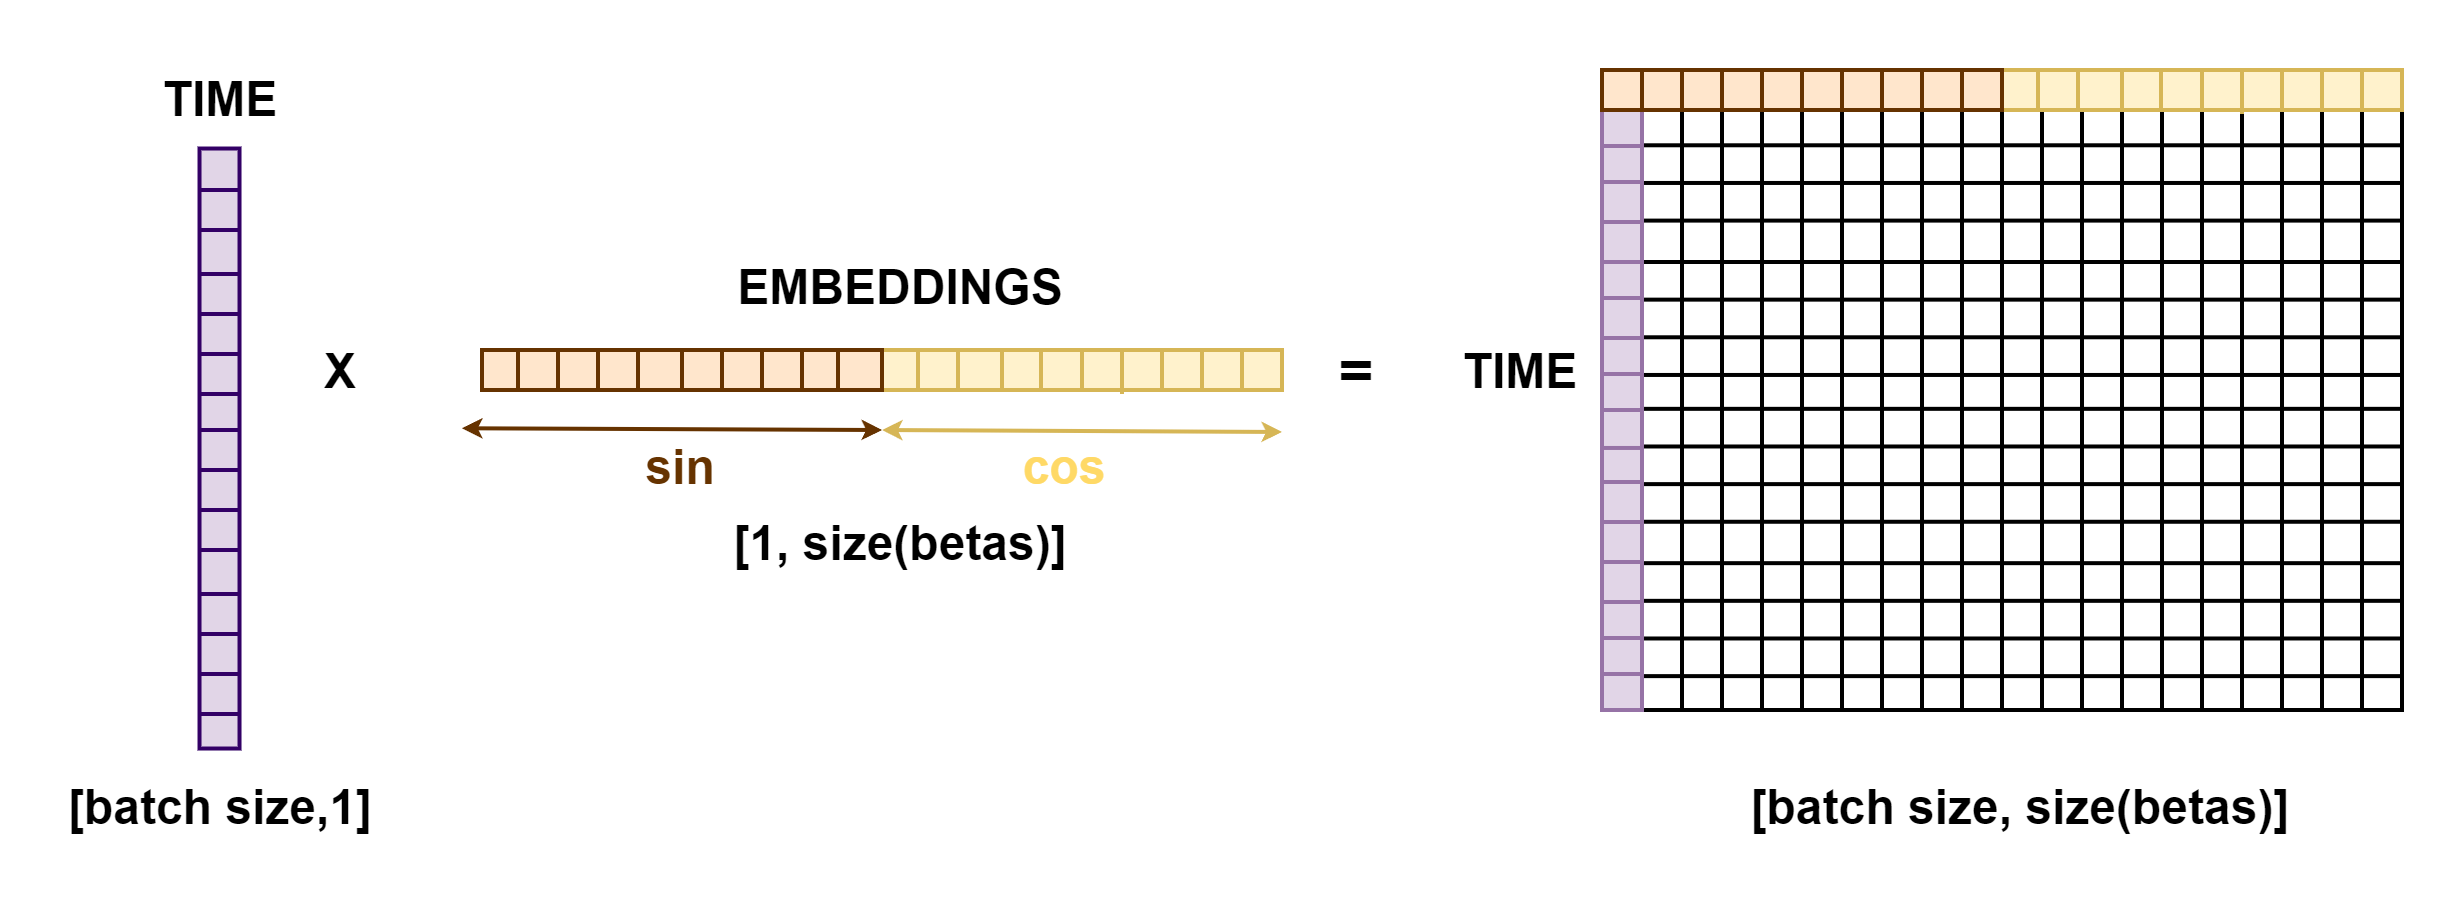

In [ ]:
# The SinusoidalTimeEmbeddings module takes a tensor of shape (batch_size, 1) i.e. (64,1)
# as input (i.e. the noise levels of several noisy images in a batch), and turns this
# into a tensor of shape (batch_size, dim), with dim being the dimensionality of the
# Time embeddings. This is then added to each residual block, as we will see further.
class SinusoidalTimeEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        # half of embedding dim
        half_dim = self.dim // 2
        # scaling factor for sinusoidal Time embeddings
        embeddings = math.log(10000) / (half_dim - 1)
        # generate sinusoidal Time embeddings
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        # expand time tensor along second dimesion, multiply with embeddings
        embeddings = time[:, None] * embeddings[None, :]
        # concatenate sine and cosing embeddings along last dimension
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        return embeddings

### <b><h3><font color='#569098'> 2. 신경망 (NEURAL NET) </font></b></h3>

이제 임베딩이 준비되었으므로 활성화 함수가 뒤따르는 여러 깊게 연결된 레이어로 구성된 간단한 데이터셋을 위한 다층 퍼셉트론(MLP) 모델을 사용합니다.

`Diffuser_MLP`는 시간 $t$의 노이즈 상태 $x_t$에서 디노이징된 데이터 $x_0$를 예측합니다. 입력 크기(input_size), 레이어 사이에 적용될 활성화 함수(fun), 레이어 크기 목록(layers)을 받아 입력과 동일한 크기의 출력을 반환합니다.

정방향 메서드는 입력 텐서 `x`와 `time tensor`를 받아 시간 텐서에 사인파 시간 임베딩을 적용하고 입력 텐서와 연결한 다음 MLP 레이어를 통해 공급합니다.


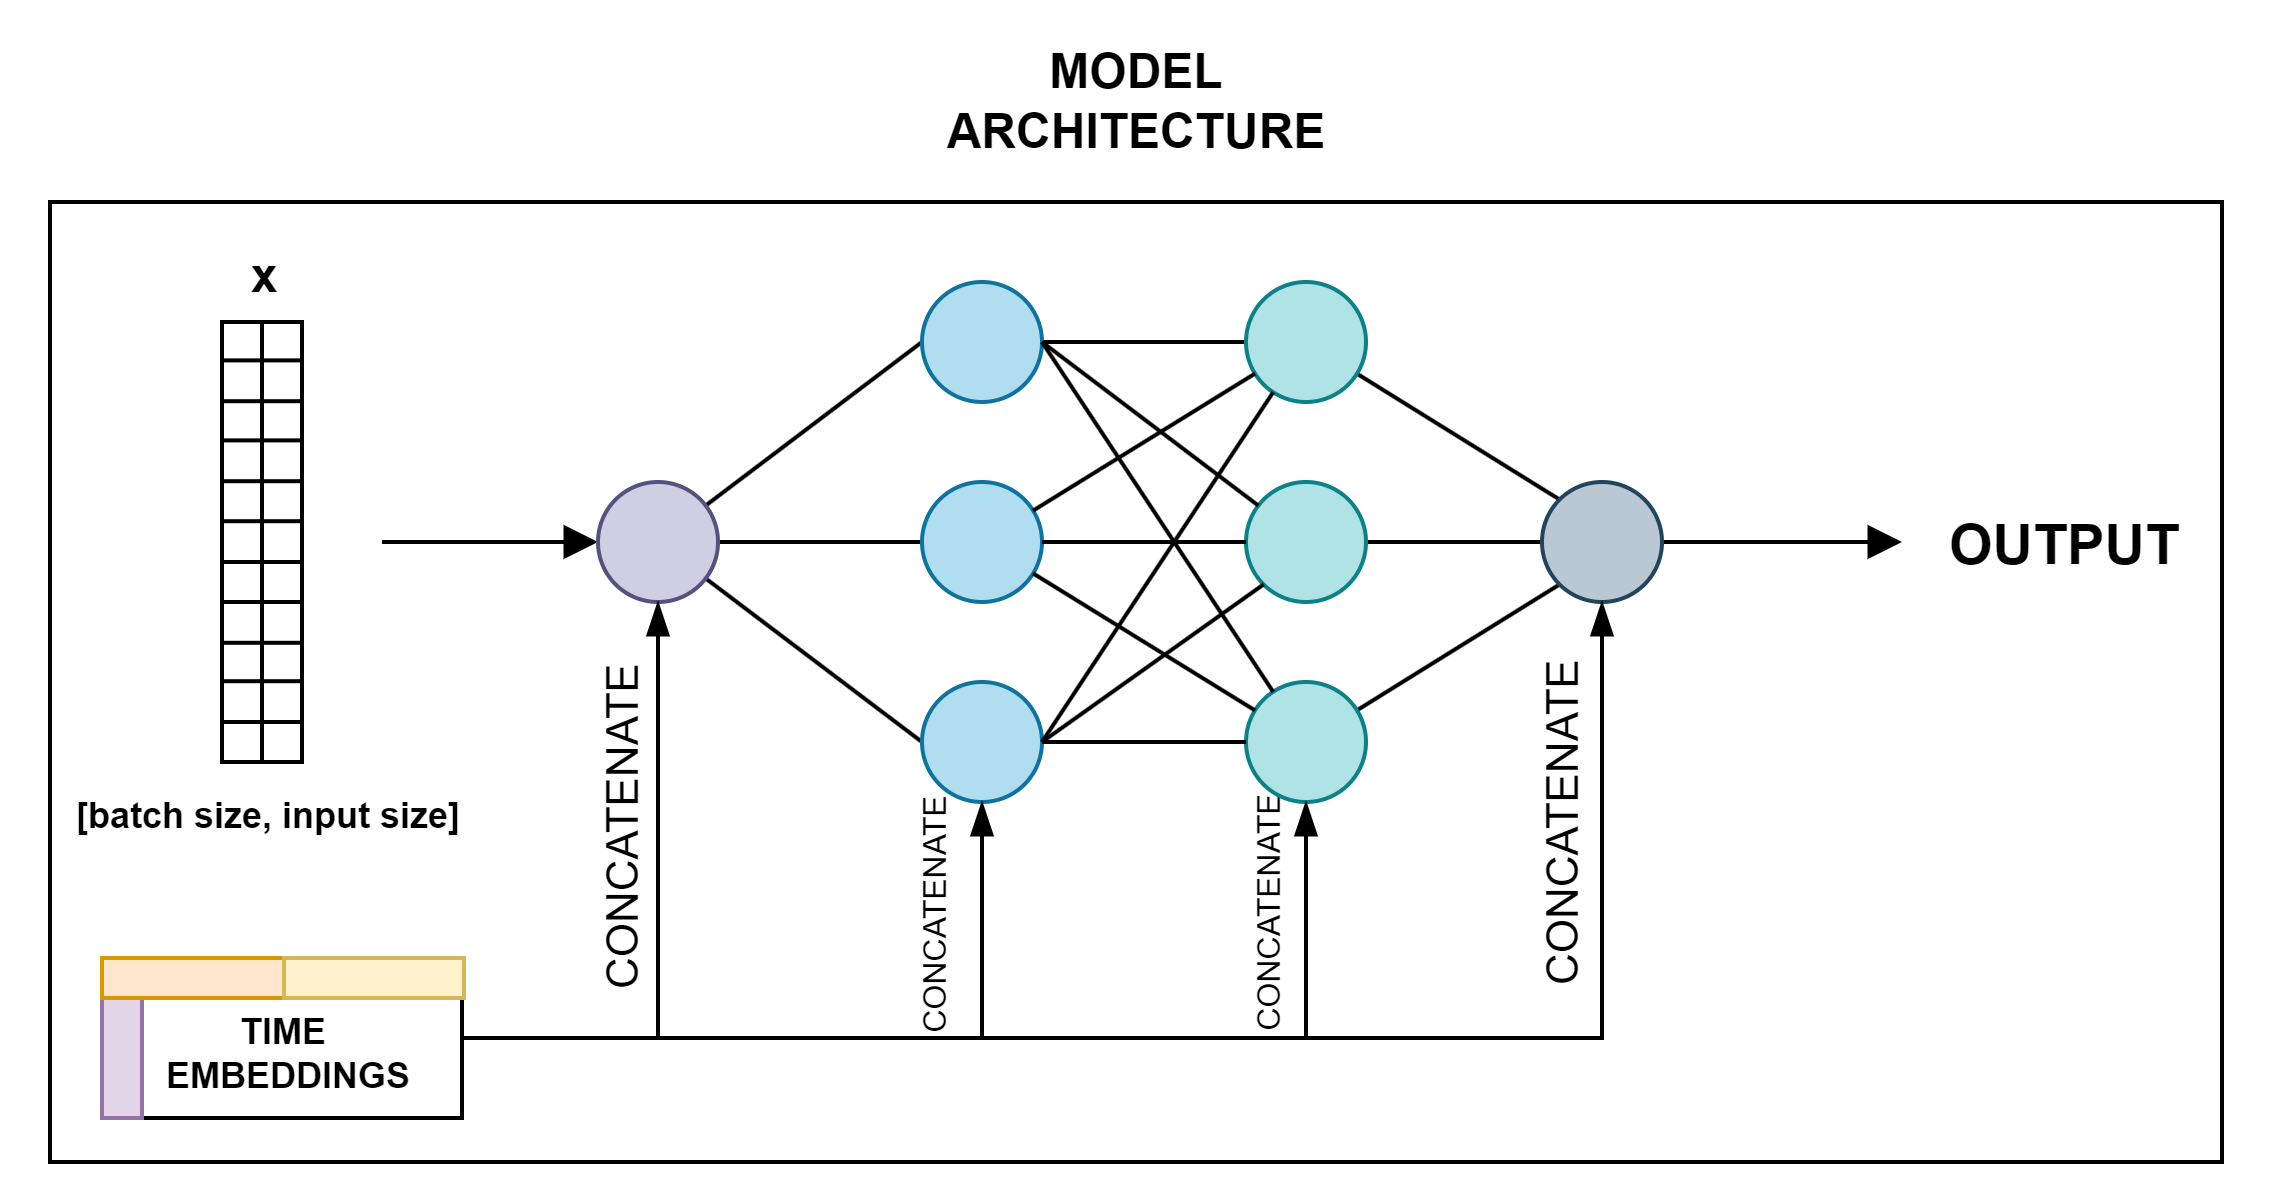

In [ ]:
class Diffuser_MLP(nn.Module):
  """this model learns to predict the denoised data x_0 from the noised state x_t and the time t"""
  def __init__(self, input_size, *, fun=None, layers=None):
    """fun is the activation function; layers is a list of integers, with the integer indicating the width of the embedding dimension as a factor of the input data size"""
    super().__init__()

    # dim of time embedding based on size of betas
    self.time_embedding_dim = math.ceil( math.log2(betas.shape[0]) ) * 2
    # initialize SinusoidalTimeEmbeddings
    self.time_embedding_nn = SinusoidalTimeEmbeddings(self.time_embedding_dim)
    # initialize sequential NN
    self.net = torch.nn.Sequential()

    # compute initial size of input to NN
    prev_size = input_size + self.time_embedding_dim
    # iterate through layers
    for l in layers:
      # compute layer size
      new_size = int(input_size*l)
      # add linear layer to NN
      self.net.append( torch.nn.Linear(prev_size, new_size) )
      # append activation function
      self.net.append( fun() )
      # update previous size for next layer
      prev_size = new_size

    # append linear layer to NN to map final size to input
    self.net.append( torch.nn.Linear(prev_size, input_size) )

  def forward(self, x, time):
    # compute time embedding for given time
    time_embedding = self.time_embedding_nn(time).squeeze(1)
    # concatenate input data with time embeddings
    x_t = torch.cat((x, time_embedding), -1)
    # pass concatenated data through NN
    output = self.net(x_t)
    return output

모델을 인스턴스화하고, 입력 데이터를 제공하고, 모델의 출력을 계산하고, 데이터 객체의 모양이 올바른지 확인해 봅시다.

In [ ]:
# instantiate
diff = Diffuser_MLP(input_size, fun=torch.nn.ReLU, layers=(3, 3) )

# example time tensor by expanding single value along batch dimension to match 'example' shape
example_time = torch.Tensor([0]).expand(example.shape[0], 1)

# pass exmaple data and exmaple_time through diffuser NN to get output
output = diff(example, example_time)

# shape of input data, example_time, and output tensor
example.shape, example_time.shape, output.shape

(torch.Size([64, 32]), torch.Size([64, 1]), torch.Size([64, 32]))

### <b><h3><font color='#569098'> 3. 학습 (TRAINING) </font></b></h3>

학습할 시간입니다! 각 에포크 내에서 데이터 로더를 반복하여 데이터 배치를 처리합니다. 각 배치에 대해 무작위 타임스텝이 선택되고 이전에 정의한 코사인 스케줄러에 따라 노이즈 데이터가 생성됩니다. 모델은 이 노이즈 입력 데이터를 해당 시간 정보와 함께 처리하고 출력을 계산합니다. 그런 다음 모델의 출력과 노이즈 데이터 간에 평균 제곱 오차 손실이 계산됩니다. 그 후 그래디언트는 0이 되고, 역전파가 실행되어 옵티마이저를 사용하여 모델의 파라미터를 업데이트합니다. 학습 과정 전반에 걸쳐 로깅 목적으로 총 손실이 누적되고 단계별 평균 손실이 계산됩니다.

Adam 옵티마이저는 확산 모델의 파라미터를 최적화하는 데 사용됩니다. ExponentialLR 스케줄러는 학습 중에 학습률을 조절하여 수렴을 용이하게 하는 적응형 조정을 제공하는 데 활용됩니다. 기본 학습 루프에서 모델은 여러 에포크에 걸쳐 학습되며, 각 에포크는 일련의 학습 단계로 구성됩니다. 각 에포크가 완료되면 스케줄러를 사용하여 학습률이 업데이트됩니다.

last_losses=[0.1390904188156128, 0.11419769376516342, 0.12434312701225281, 0.12849435210227966]
mean_loss=0.12653139233589172


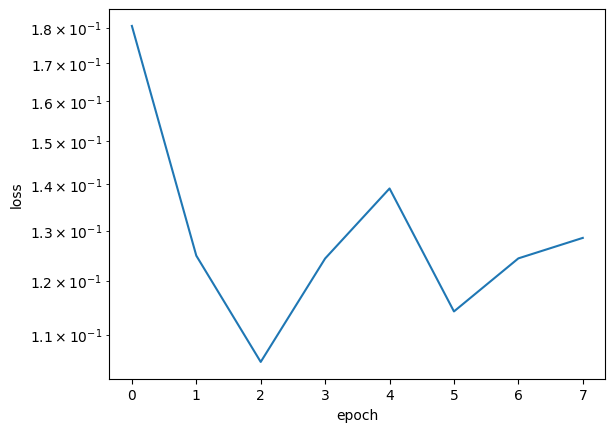

In [ ]:
def train(model, optimizer, *, n_steps):
    # Set the model in training mode
    model.train()

    # Define the loss function as Mean Squared Error
    loss_fn = nn.MSELoss()

    # Iterate through training steps
    for epoch in range(n_steps):
        total_loss = 0
        total_loss_count = 0

        # Iterate through data batches
        for batch in data_loader:
            # Randomly select a time
            t = random.randrange(0, betas.shape[0])

            # Generate noised data for the selected time step
            input, noise = noised_data(batch, t)

            # Pass the input data and time to the model to get the output
            output = model(input, torch.Tensor([t]).expand(input.shape[0], 1))

            # Compute the loss between the output and the noise
            loss = loss_fn(output, noise)

            # Compute the mean loss
            loss = loss.mean()

            # Reset gradients
            optimizer.zero_grad(set_to_none=True)

            # Perform backpropagation
            loss.backward()

            # Update model parameters
            optimizer.step()

            # Accumulate total loss
            total_loss += loss
            total_loss_count += 1

    # Compute the total loss average over the training batch
    total_loss = total_loss / total_loss_count

    # Append the total loss to historical_total_loss list
    with torch.no_grad():
        historical_total_loss.append(total_loss.item())

    # Return the last historical total loss
    return historical_total_loss[-1]

# Initialize Adam optimizer for the Diffuser_MLP model parameters with learning rate 1e-3
optimizer = torch.optim.Adam(diff.parameters(), lr=1e-3)

# Initialize ExponentialLR scheduler for the optimizer with gamma 0.9
lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

# Iterate training for 8 epochs
for i in range(8):
    # Perform training for 32 steps
    total_loss = train(diff, optimizer, n_steps=32)

    # Adjust learning rate using lr_scheduler
    lr_scheduler.step()

    # Clear previous plot and plot historical total losses
    pl.clf()
    plt.yscale('log')
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.plot(historical_total_loss[:])
    display(pl.gcf())

    # Calculate mean loss over the last 4 epochs
    mean_loss = torch.Tensor(historical_total_loss[-4:]).mean().item()

    # Extract the last 4 losses
    last_losses = historical_total_loss[-4:]

    # Print the last 4 losses and the mean loss
    print(f'{last_losses=}\n{mean_loss=}')

    # Clear output for the next iteration
    clear_output(wait=True)

# Print the last 4 losses and the mean loss after completing all epochs
print(f'{last_losses=}\n{mean_loss=}')


### <b><h3><font color='#569098'> 4. 생성 (GENERATION) </font></b></h3>

이제 학습된 확산 모델에서 샘플링하여 합성 이미지를 생성할 수 있습니다. 최종 타임스텝에서 시작하여 시간 역순으로 진행하면서 확산 모델에서 반복적으로 샘플링할 것입니다. 각 샘플은 모델의 평균 출력을 기반으로 생성되며 선택적으로 가우스 노이즈로 증강됩니다.

진행하기 전에 이해해야 할 마지막 개념이 하나 있습니다 - **사후 분산(Posterior Variance)**

샘플링 단계에서 목표는 학습된 모델에서 학습 데이터와 유사한 새 데이터를 생성하는 것입니다. 사후 분산은 데이터 생성 프로세스에 내재된 불확실성을 관리하고 현실적이고 다양한 출력을 달성하기 위해 각 단계에서 추가하거나 제거할 노이즈의 양을 안내하는 데 도움이 됩니다.

예를 들어 이미지를 생성하는 데 사용되는 확산 모델은 이미지 분포의 평균과 데이터의 분산을 모두 학습합니다. 모델이 이미지 분포의 평균만 학습하고 분산을 무시하면 서로 너무 유사하고 다양성이 부족한 이미지를 생성할 수 있습니다. 사후 분산을 통합함으로써 모델은 미묘한 차이가 있는 다양한 이미지를 생성하여 데이터셋에 존재하는 실제 변동성을 반영할 수 있습니다.

사후 분산은 다음 공식으로 주어집니다.

<img src = 'https://learnopencv.com/wp-content/uploads/2023/02/denoising-diffusion-probabilistic-models-loss_equations_6.png' width ='1000px'>


여기서 $\bar{\mu_t}, \bar{\beta_t}$는 누적 곱에 따라 달라집니다.

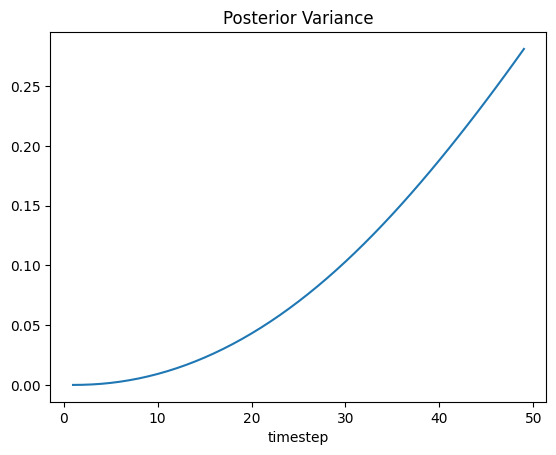

In [ ]:
posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)
plt.plot(posterior_variance)
plt.xlabel("timestep");
plt.title("Posterior Variance");

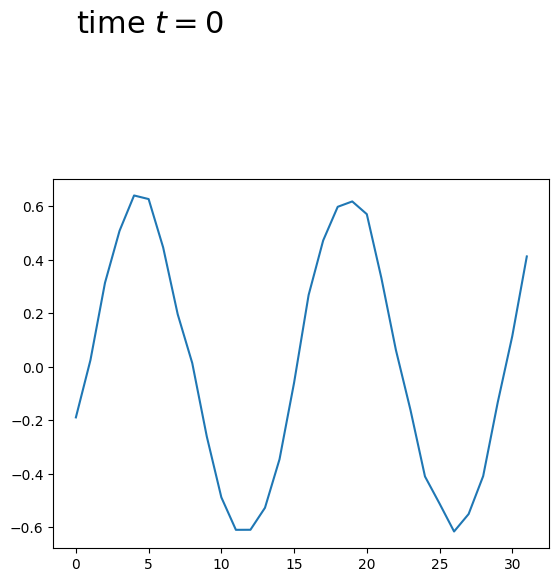

In [ ]:
# Decorator to temporarily disable gradient computation
@torch.no_grad()
def sample(model, x, t, t_index):
    # Extract necessary parameters for the current time step
    betas_t = betas[t]
    sqrt_one_minus_alphas_cumprod_t = sqrt_one_minus_alphas_cumprod[t]
    sqrt_recip_alphas_t = sqrt_recip_alphas[t]

    # Compute the mean of the model's output
    model_mean = sqrt_recip_alphas_t * (x - betas_t * model(x, t) / sqrt_one_minus_alphas_cumprod_t)

    # If it's the first time step, return the model mean
    if t_index == 0:
        return model_mean
    else:
        # Extract posterior variance for the current time step
        posterior_variance_t = posterior_variance[t]

        # Generate Gaussian noise
        noise = torch.randn_like(x)

        # Return the sample by adding noise scaled by the square root of the posterior variance to the model mean
        return model_mean + torch.sqrt(posterior_variance_t) * noise

# Generate random input tensor 'x'
x = torch.randn((input_size,)).unsqueeze(0)

# Iterate through time steps in reverse order
for t in torch.arange(betas.shape[0]-1, -1, -1):
    # Clear the previous plot
    pl.clf()
    if torch.remainder(t,2) == 0:
      # Plot the current state of 'x' without gradients
      plt.plot(x[0].detach())
      plt.text(0, 1.25, 'time $t = $'+str(t.item()), fontsize = 22)
      # plt.annotate(f'{t}', xy=(0,1))
      # Display the plot
      display(pl.gcf())

      # Pause for a short duration
      time.sleep(.02)

      # Clear the output for the next iteration
      clear_output(wait=True)

    # Expand 't' tensor to match the shape (1, 1)
    T = torch.Tensor([t]).to(torch.long).expand(1, 1)

    # Sample a new 'x' using the model and the current time step
    x = sample(diff, x, T, t)



# <b> <font color='#569098'> 섹션 4: 요약 및 복습 질문</font>


확산 모델은 생성 모델링에 강력하고 유연한 접근 방식을 제공하며, 특히 고품질의 다양한 샘플이 필요한 시나리오에서 그렇습니다. 이 워크숍에서는 다음 주요 영역에서 디노이징 확산 확률 모델(DDPM)의 개념과 구현을 살펴보았습니다:

**<font color='#569098'> 1. 확산 모델 이해하기 </font>**   
   - **정방향 프로세스:** 정방향 프로세스는 데이터에 점진적으로 노이즈를 추가하여 여러 단계에 걸쳐 순수한 노이즈로 변환하는 것을 포함합니다.
   - **역방향 프로세스:** 역방향 프로세스는 노이즈 데이터를 단계별로 디노이징하여 원본 데이터를 재구성하거나 새 샘플을 생성하는 것을 목표로 합니다.

**<font color='#569098'> 2. 수학적 기초 </font>**
   - **확산 방정식:** 노이즈 스케줄을 포함하여 정방향 및 역방향 확산 프로세스를 지배하는 수학적 방정식이 설명되었습니다.
   -**손실 항**: 누적 손실 및 ELBO가 소개되었습니다.
   - **사후 분산:** 샘플링 프로세스 중 다양성과 안정성을 보장하는 데 있어 사후 분산의 역할이 논의되었습니다.

이제 확산 모델의 논리, 수학 및 응용에 대해 잘 이해했을 것입니다.

**<font color='#569098'> 다음 질문에 답하여 지식을 테스트해 보세요!</font>**

1. **확산 모델에서 정방향 프로세스 q의 목적은 무엇입니까?**
2.**정방향 프로세스에서 분산 스케줄 $β_t$의 중요성은 무엇입니까?**
3. **선형 노이즈 스케줄과 코사인 노이즈 스케줄의 차이점을 설명하세요.**
4. **확산 모델에서 역방향 프로세스의 목표는 무엇입니까?**
5. **역방향 프로세스에서 조건부 분포 $p(x_{t−1}∣x_t)$가 중요한 이유는 무엇입니까?**
6. **실제로 실제 조건부 분포 $p(x_{t−1}∣x_t)$를 직접 사용할 수 없는 이유는 무엇입니까?**
7. **실제로 조건부 분포 $p(x_{t−1}∣x_t)$를 어떻게 근사합니까?**

In [ ]:
# @markdown <font color='#e59454'> <b> Run cell for all answers!</b></font>


print("1. The forward process q gradually adds noise to the data over a number of timesteps until we end up with pure Gaussian noise. \n The purpose of this process is to transform the original data x_0 into increasingly noisy versions x_t​ until it becomes pure Gaussian noise at the final timestep T")
print("2. βt controls the amount of noise added at each timestep. It starts with a small value and gradually increases such that the data becomes more noisy over time. \nThe final timestep T has the highest noise level, ensuring the data has been transformed into pure Gaussian noise. The schedule is designed to prevent the variance from exploding while ensuring the gradual transformation.")
print("3. A linear noise schedule increases the noise linearly over time: the original image information is quickly lost after about half of the total steps.\n A cosine noise schedule, on the other hand, adds noise more slowly at the beginning and increases it more rapidly towards the end. This helps in preserving the information in the earlier timesteps, making the denoising process more efficient and retaining more of the original data information.")
print("4. To generate the original image from its noised version. This involves starting with Gaussian noise and gradually denoising it to produce a sample from the real data distribution.")
print("5. p(xt−1∣xt) is important because it describes how to transition from the noised version at time t to a slightly less noised version at time t−1.\n Knowing this distribution allows us to iteratively denoise an image.")
print("6. We can't directly use p(xt−1∣xt) because it is intractable. Calculating this distribution would require knowing the distribution of all possible samples, which is computationally infeasible.")
print("7. We approximate p(xt−1∣xt) using a neural network. The neural network learns to predict the conditional probability distribution, denoted as pθ(xt−1∣xt), \n where θ represents the parameters of the neural network.")




1. The forward process q gradually adds noise to the data over a number of timesteps until we end up with pure Gaussian noise. 
 The purpose of this process is to transform the original data x_0 into increasingly noisy versions x_t​ until it becomes pure Gaussian noise at the final timestep T
2. βt controls the amount of noise added at each timestep. It starts with a small value and gradually increases such that the data becomes more noisy over time. 
The final timestep T has the highest noise level, ensuring the data has been transformed into pure Gaussian noise. The schedule is designed to prevent the variance from exploding while ensuring the gradual transformation.
3. A linear noise schedule increases the noise linearly over time: the original image information is quickly lost after about half of the total steps.
 A cosine noise schedule, on the other hand, adds noise more slowly at the beginning and increases it more rapidly towards the end. This helps in preserving the informatio